# Simulation HEPAR Bayesian Network

References:


1.   https://www.bnlearn.com/bnrepository/discrete-large.html#hepar2
2.   A. Onisko. Probabilistic Causal Models in Medicine: Application to Diagnosis of Liver Disorders. Ph.D. Dissertation, Institute of Biocybernetics and Biomedical Engineering, Polish Academy of Science, Warsaw, March 2003.



In [ ]:
!pip install pgmpy
!pip install -U bnlearn
!pip install pyvis
!pip install lime
!pip install araucanaxai

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import networkx as nx
import bnlearn as bn

from collections import Counter

import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

from google.colab import drive
ROOT_PATH = '/content/drive'
drive.mount(ROOT_PATH)
ROOT_PATH += '/My Drive/XAI'

Mounted at /content/drive


## Bayesian Network 

In [ ]:
arcs = pd.read_csv(ROOT_PATH + '/HEPAR_arcs.csv', index_col=0)
arcs.head()

,from,to
1,alcoholism,THepatitis
2,alcoholism,Steatosis
3,vh_amn,ChHepatitis
4,vh_amn,hbsag
5,vh_amn,hbsag_anti


In [ ]:
edges = []
for i,r in arcs.iterrows():
  edges.append((r['from'], r['to']))

In [ ]:
edges

[('alcoholism', 'THepatitis'),
 ('alcoholism', 'Steatosis'),
 ('vh_amn', 'ChHepatitis'),
 ('vh_amn', 'hbsag'),
 ('vh_amn', 'hbsag_anti'),
 ('vh_amn', 'hbc_anti'),
 ('vh_amn', 'hcv_anti'),
 ('vh_amn', 'hbeag'),
 ('hepatotoxic', 'THepatitis'),
 ('hepatotoxic', 'RHepatitis'),
 ('THepatitis', 'fatigue'),
 ('THepatitis', 'phosphatase'),
 ('THepatitis', 'inr'),
 ('THepatitis', 'hepatomegaly'),
 ('THepatitis', 'alt'),
 ('THepatitis', 'ast'),
 ('THepatitis', 'ggtp'),
 ('THepatitis', 'anorexia'),
 ('THepatitis', 'nausea'),
 ('THepatitis', 'spleen'),
 ('hospital', 'injections'),
 ('hospital', 'transfusion'),
 ('surgery', 'injections'),
 ('surgery', 'transfusion'),
 ('gallstones', 'choledocholithotomy'),
 ('gallstones', 'bilirubin'),
 ('gallstones', 'upper_pain'),
 ('gallstones', 'fat'),
 ('gallstones', 'pressure_ruq'),
 ('gallstones', 'flatulence'),
 ('gallstones', 'amylase'),
 ('choledocholithotomy', 'injections'),
 ('choledocholithotomy', 'transfusion'),
 ('injections', 'ChHepatitis'),
 ('tran

In [ ]:
# Create the DAG
DAG = bn.make_DAG(edges)
bn.plot(DAG, interactive=True)

[bnlearn] >bayes DAG created.
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f9543c1d7d0>,
 'edge_properties': {('ChHepatitis', 'ESR'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'alt'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'ast'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'bilirubin'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'cholesterol'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'fatigue'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'fibrosis'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'ggtp'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'hbc_anti'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'hbeag'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'hbsag'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'hbsag_anti'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'hcv_anti'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'inr'): {'color': '#000000', 'weight': 1},
  ('ChHepatitis', 'pho

## Loading simulated data from the network


In [ ]:
dataset = pd.read_csv(ROOT_PATH+'/HEPAR_simulated_patients.csv', index_col=0)
dataset.head()

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,ChHepatitis,sex,age,PBC,fibrosis,diabetes,obesity,Steatosis,Cirrhosis,Hyperbilirubinemia,triglycerides,RHepatitis,fatigue,bilirubin,itching,upper_pain,fat,pain_ruq,pressure_ruq,phosphatase,skin,ama,le_cells,joints,pain,proteins,edema,platelet,inr,bleeding,flatulence,alcohol,encephalopathy,urea,ascites,hepatomegaly,hepatalgia,density,ESR,alt,ast,amylase,ggtp,cholesterol,hbsag,hbsag_anti,anorexia,nausea,spleen,consciousness,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
1,absent,present,absent,absent,absent,absent,absent,absent,absent,absent,persistent,female,age51_65,absent,absent,absent,absent,present,compensate,absent,a1_0,absent,present,a1_0,present,absent,absent,absent,absent,a699_240,absent,absent,absent,absent,absent,a10_6,absent,a299_150,a109_70,absent,absent,absent,absent,a39_0,absent,present,absent,absent,a14_0,a34_0,a39_0,a299_0,a9_0,a999_350,absent,absent,absent,present,present,absent,absent,present,a70_50,absent,present,absent,present,absent,absent,absent
2,absent,absent,absent,absent,absent,absent,present,absent,absent,absent,absent,female,age31_50,present,absent,absent,absent,absent,absent,absent,a1_0,absent,absent,a6_2,absent,absent,present,absent,absent,a239_0,present,present,absent,absent,absent,a10_6,absent,a149_100,a109_70,absent,present,absent,absent,a39_0,absent,present,present,absent,a49_15,a99_35,a149_40,a299_0,a69_30,a349_240,absent,absent,absent,absent,present,absent,absent,present,a29_0,absent,absent,absent,absent,absent,absent,absent
3,absent,absent,absent,absent,present,absent,absent,absent,present,absent,absent,female,age31_50,absent,absent,absent,absent,absent,absent,absent,a1_0,absent,present,a1_0,absent,absent,absent,present,present,a4000_700,absent,absent,absent,absent,absent,a10_6,absent,a299_150,a109_70,absent,absent,absent,absent,a39_0,absent,present,absent,present,a14_0,a34_0,a39_0,a299_0,a29_10,a239_0,absent,absent,absent,present,absent,absent,absent,absent,a70_50,absent,absent,absent,absent,present,absent,absent
4,absent,absent,absent,absent,present,absent,absent,absent,absent,absent,active,male,age51_65,absent,absent,absent,absent,absent,absent,absent,a1_0,absent,present,a1_0,absent,present,absent,absent,absent,a239_0,absent,absent,absent,absent,absent,a10_6,absent,a299_150,a109_70,absent,absent,absent,absent,a39_0,absent,present,absent,absent,a14_0,a199_100,a149_40,a299_0,a9_0,a239_0,absent,absent,absent,present,absent,absent,absent,present,a70_50,absent,absent,absent,absent,absent,absent,absent
5,absent,present,absent,absent,absent,absent,present,present,absent,absent,absent,male,age65_100,present,absent,absent,absent,absent,absent,absent,a1_0,absent,present,a6_2,absent,absent,absent,absent,present,a4000_700,present,absent,absent,absent,absent,a10_6,absent,a299_150,a109_70,absent,absent,absent,absent,a39_0,absent,present,present,present,a200_50,a34_0,a39_0,a299_0,a9_0,a239_0,absent,absent,absent,absent,absent,absent,present,absent,a70_50,absent,absent,absent,absent,present,absent,absent


In [ ]:
dataset.shape

(10000, 70)

In [ ]:
# Categorical variables handled
dataset_num = dataset.copy()

In [ ]:
dataset.describe()

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,ChHepatitis,sex,age,PBC,fibrosis,diabetes,obesity,Steatosis,Cirrhosis,Hyperbilirubinemia,triglycerides,RHepatitis,fatigue,bilirubin,itching,upper_pain,fat,pain_ruq,pressure_ruq,phosphatase,skin,ama,le_cells,joints,pain,proteins,edema,platelet,inr,bleeding,flatulence,alcohol,encephalopathy,urea,ascites,hepatomegaly,hepatalgia,density,ESR,alt,ast,amylase,ggtp,cholesterol,hbsag,hbsag_anti,anorexia,nausea,spleen,consciousness,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,2,2,2,2,2,2,2,2,3,2,4,2,2,2,2,2,3,2,3,2,2,4,2,2,2,2,2,3,2,2,2,2,2,2,2,4,3,2,2,2,2,3,2,2,2,2,3,4,4,3,4,3,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2
top,absent,absent,absent,absent,present,absent,absent,absent,absent,absent,absent,female,age31_50,absent,absent,absent,absent,absent,absent,absent,a1_0,absent,present,a1_0,absent,absent,absent,absent,absent,a239_0,absent,absent,absent,absent,absent,a10_6,absent,a299_150,a109_70,absent,absent,absent,absent,a39_0,absent,present,absent,absent,a14_0,a99_35,a149_40,a299_0,a9_0,a239_0,absent,absent,absent,absent,absent,absent,absent,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
freq,8680,8290,9136,9596,5293,5773,8441,8594,6154,8383,8170,5989,3960,6125,9584,9596,9310,9040,9169,9289,9156,9774,5578,6513,5733,6191,7283,5754,6182,5201,6139,7728,9295,8899,7758,9821,8615,6912,8658,8366,5674,8811,9646,8916,8660,6735,7910,6083,6833,4079,4608,9679,6063,7491,9079,9845,7220,7127,8734,9755,7868,7297,7533,7282,8582,9071,9977,8335,9965,9340


In [ ]:
dataset['spleen'].value_counts()

absent     8734
present    1266
Name: spleen, dtype: int64

In [ ]:
dataset['age'].value_counts()

age31_50     3960
age51_65     3872
age0_30      1360
age65_100     808
Name: age, dtype: int64

In [ ]:
dataset['triglycerides'].value_counts()

a1_0     9156
a3_2      450
a17_4     394
Name: triglycerides, dtype: int64

In [ ]:
dataset['bilirubin'].value_counts()

a1_0      6513
a6_2      2509
a19_7      818
a88_20     160
Name: bilirubin, dtype: int64

In [ ]:
dataset['phosphatase'].value_counts()

a239_0       5201
a699_240     3141
a4000_700    1658
Name: phosphatase, dtype: int64

In [ ]:
dataset['proteins'].value_counts()

a10_6    9821
a5_2      179
Name: proteins, dtype: int64

In [ ]:
dataset['platelet'].value_counts()

a299_150    6912
a149_100    1528
a597_300     881
a99_0        679
Name: platelet, dtype: int64

In [ ]:
dataset['inr'].value_counts()

a109_70     8658
a69_0        782
a200_110     560
Name: inr, dtype: int64

In [ ]:
dataset['urea'].value_counts()

a39_0      8916
a49_40      676
a165_50     408
Name: urea, dtype: int64

In [ ]:
dataset['ESR'].value_counts()

a14_0      6833
a200_50    1906
a49_15     1261
Name: ESR, dtype: int64

Handling categorical and nominal data

In [ ]:
nominal_feat = ['age', 'triglycerides', 'bilirubin', 'phosphatase', 'proteins', 'platelet', 
                                      'inr', 'urea', 'ESR', 'alt', 'ast','amylase', 'ggtp', 'cholesterol', 'albumin'
                                      ]

nominal_dict = {}
for n in nominal_feat:
  unique_val = dataset[n].unique().tolist()
  unique_num = [int(x.split('_')[1]) for x in unique_val]
  val2num = dict(zip(unique_val, unique_num))
  num2cat = dict(zip(sorted(unique_num), range(1, len(unique_num)+1)))
  dict_n = {}
  for k,v in val2num.items():
    dict_n[k] = num2cat[v]
  nominal_dict[n] = dict_n

In [ ]:
unique_val

['a70_50', 'a29_0', 'a49_30']

In [ ]:
dataset['Cirrhosis'].value_counts()

absent          9169
decompensate     593
compensate       238
Name: Cirrhosis, dtype: int64

In [ ]:
dataset['sex'].value_counts()

female    5989
male      4011
Name: sex, dtype: int64

In [ ]:
dataset['ChHepatitis'].value_counts()

absent        8170
active        1302
persistent     528
Name: ChHepatitis, dtype: int64

In [ ]:
special_feat = ['ChHepatitis', 'sex', 'Cirrhosis']

dict_chhepa = {'absent':0, 'active':1, 'persistent':2}
dict_sex = {'female':1, 'male':2}
dict_cirr = {'absent':0, 'decompensate':1, 'compensate':2}

dataset_num['sex'] = [dict_sex[x] for x in dataset['sex']]
dataset_num['ChHepatitis'] = [dict_chhepa[x] for x in dataset['ChHepatitis']]
dataset_num['Cirrhosis'] = [dict_cirr[x] for x in dataset['Cirrhosis']]

In [ ]:
categorical_feat = [x for x in dataset.columns if x not in nominal_feat+special_feat]
dict_cat = {'absent':0, 'present':1}
for c in categorical_feat:
  print(c)
  dataset_num[c] = [dict_cat[x] for x in dataset[c]]

alcoholism
vh_amn
hepatotoxic
THepatitis
hospital
surgery
gallstones
choledocholithotomy
injections
transfusion
PBC
fibrosis
diabetes
obesity
Steatosis
Hyperbilirubinemia
RHepatitis
fatigue
itching
upper_pain
fat
pain_ruq
pressure_ruq
skin
ama
le_cells
joints
pain
edema
bleeding
flatulence
alcohol
encephalopathy
ascites
hepatomegaly
hepatalgia
density
hbsag
hbsag_anti
anorexia
nausea
spleen
consciousness
spiders
jaundice
edge
irregular_liver
hbc_anti
hcv_anti
palms
hbeag
carcinoma


In [ ]:
for n in nominal_feat:
  newcol = [nominal_dict[n][x] for x in dataset[n]]
  dataset_num[n] = newcol


In [ ]:
dataset_num.describe()

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,ChHepatitis,sex,age,PBC,fibrosis,diabetes,obesity,Steatosis,Cirrhosis,Hyperbilirubinemia,triglycerides,RHepatitis,fatigue,bilirubin,itching,upper_pain,fat,pain_ruq,pressure_ruq,phosphatase,skin,ama,le_cells,joints,pain,proteins,edema,platelet,inr,bleeding,flatulence,alcohol,encephalopathy,urea,ascites,hepatomegaly,hepatalgia,density,ESR,alt,ast,amylase,ggtp,cholesterol,hbsag,hbsag_anti,anorexia,nausea,spleen,consciousness,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.132000,0.171000,0.086400,0.040400,0.529300,0.422700,0.155900,0.140600,0.384600,0.161700,0.235800,1.401100,2.412800,0.387500,0.041600,0.040400,0.069000,0.096000,0.106900,0.071100,1.123800,0.022600,0.557800,1.462500,0.426700,0.380900,0.271700,0.424600,0.381800,1.645700,0.386100,0.227200,0.070500,0.11010,0.224200,1.982100,0.138500,2.799500,1.977800,0.163400,0.432600,0.118900,0.035400,1.149200,0.134000,0.673500,0.209000,0.391700,1.507300,1.906400,1.900500,1.042100,1.787200,1.301300,0.092100,0.015500,0.278000,0.287300,0.126600,0.024500,0.213200,0.270300,2.645300,0.27180,0.141800,0.092900,0.002300,0.166500,0.00350,0.066000
std,0.338508,0.376528,0.280968,0.196905,0.499166,0.494013,0.362779,0.347626,0.486525,0.368194,0.534628,0.490146,0.822231,0.487204,0.199683,0.196905,0.253467,0.294606,0.378268,0.257005,0.432773,0.148632,0.496673,0.712913,0.494623,0.485632,0.444858,0.494307,0.485852,0.748617,0.486878,0.419044,0.256001,0.31303,0.417075,0.132595,0.345441,0.687275,0.365678,0.369749,0.495461,0.323687,0.184798,0.456684,0.340669,0.468956,0.406615,0.488155,0.794487,0.854466,0.757666,0.245629,1.101743,0.557987,0.289182,0.123537,0.448036,0.452525,0.332541,0.154603,0.409588,0.444137,0.667033,0.44491,0.348862,0.290307,0.047906,0.372547,0.05906,0.248295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000

Chose what you want to predict

In [ ]:
pred_col = 'hospital'

dataset_num[pred_col].value_counts()

1    5293
0    4707
Name: hospital, dtype: int64

In [ ]:
np.random.seed(1)

dataset_class_1 = dataset_num[dataset_num[pred_col]==1]
dataset_class_0 = dataset_num[dataset_num[pred_col]==0]

n_subpop = 500
i_class_yes = np.random.randint(0, high=dataset_class_1.shape[0], size=n_subpop)
i_class_no = np.random.randint(0, high=dataset_class_0.shape[0], size=n_subpop)

X = dataset_class_1.iloc[i_class_yes].append(dataset_class_0.iloc[i_class_no])
y = X[pred_col]
X_feat = X.drop(columns=[pred_col])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(670, 69)
(330, 69)


### ML model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
ypred_gb = clf_gb.predict(X_test)

clf_rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
ypred_rf = clf_rf.predict(X_test)
clf_lr = LogisticRegression(random_state=1, penalty='l1', solver='liblinear').fit(X_train, y_train)
ypred_lr = clf_lr.predict(X_test)

In [ ]:
classifier_dict = {'GB':clf_gb, 'LR': clf_lr, 'RF': clf_rf}

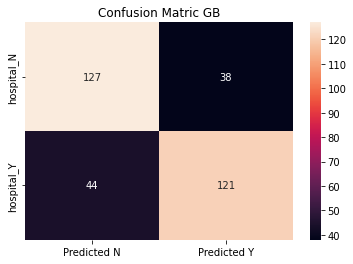

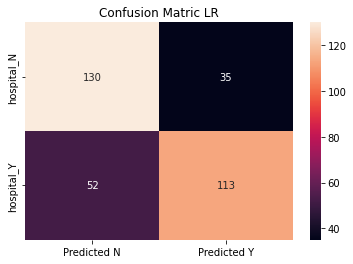

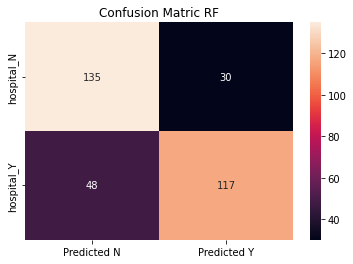

In [ ]:
from sklearn.metrics import *
import seaborn as sns

for k,v in classifier_dict.items():

  tn, fp, fn, tp = confusion_matrix(y_test, v.predict(X_test)).ravel()
  confmat = pd.DataFrame(data=np.array([[tn, fp], 
                                        [fn, tp]]), 
                        index=[pred_col+'_N', pred_col+'_Y'], columns=['Predicted N', 'Predicted Y'])
  fig, ax = plt.subplots()
  sns.heatmap(confmat, annot=True, fmt="d")
  plt.title('Confusion Matric '+k)
  plt.show()

In [ ]:
tp=






## XAI on test

In [ ]:
import araucanaxai
import lime.lime_tabular

In [ ]:
iscat = [x in categorical_feat for x in X_feat.columns]

In [ ]:
X_test_nd = X_test.to_numpy(dtype=float)

In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), 
                                                   )

classifier2lime_test = {}
classifier2lime_fidelity = {}

for k,v in classifier_dict.items():
  fid = []
  exp_list = []
  for i in range(X_test.shape[0]):
    instance = X_test_nd[i, :].reshape(1, X_test_nd.shape[1])
    exp = explainer_lime.explain_instance(X_test_nd[i,:], 
                                    v.predict_proba, num_features=X_test.shape[1], top_labels=1)
    fid.append(((exp.predict_proba[1]>=0.5).astype(int)==v.predict(instance)[0].astype(int)))
    exp_list.append(exp)

  classifier2lime_test[k] = exp_list
  classifier2lime_fidelity[k] = fid

In [ ]:
classifier2lime_fidelity['GB']
((exp.predict_proba[1]>=0.5).astype(int)==v.predict(instance))[0]

True

In [ ]:
# local neighborhood size as a percentage of the training size
perc_size = [0.01, 0.05, 0.1, 0.2] # 1% of traiinig size etc.
nsize = [int(X_train.shape[0]*x) for x in perc_size]
nsize2xai = {}
nsize2tree_fidelity = {}

for nneighb in nsize:
  print('Size of the neighbourhood:', nneighb)
  xai_dict = dict(zip(list(classifier_dict.keys()), [[], [], []]))

  fidelity_list = []
  # for each element in the test set  
  for i in range(X_test_nd.shape[0]):
    print(i, '/', X_test_nd.shape[0])
    #declare the instance we want to explain
    instance = X_test_nd[i, :].reshape(1, X_test_nd.shape[1])

    # for each classifier
    for k,v in classifier_dict.items():
      instance_pred_y = v.predict(instance)

      #build xai tree to explain the instance classification
      try:
        xai_tree = araucanaxai.run(x_target=instance, y_pred_target=instance_pred_y,
                              data_train=X_train.to_numpy(dtype=float), feature_names=X_test.columns, 
                              cat_list=iscat,
                              predict_fun=v.predict, neighbourhood_size=nneighb)
        xai_dict[k].append(xai_tree)
        fidelity_list.append((xai_tree['tree'].predict(instance)==instance_pred_y).astype(int))

      except:
        xai_dict[k].append(None)
        continue  
    nsize2tree_fidelity[nneighn] = fidelity
    nsize2xai[nneighb] =  xai_dict


Size of the neighbourhood: 6
0 / 330


NameError: ignored

## Explanations on Validation and on OOD samples
We randomly select 